In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# I. 실습용 데이터

In [3]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [5]:
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


# II. 탐색적 데이터 분석

In [6]:
DF.customerType.value_counts()

Offline    7506
Online     7503
Name: customerType, dtype: int64

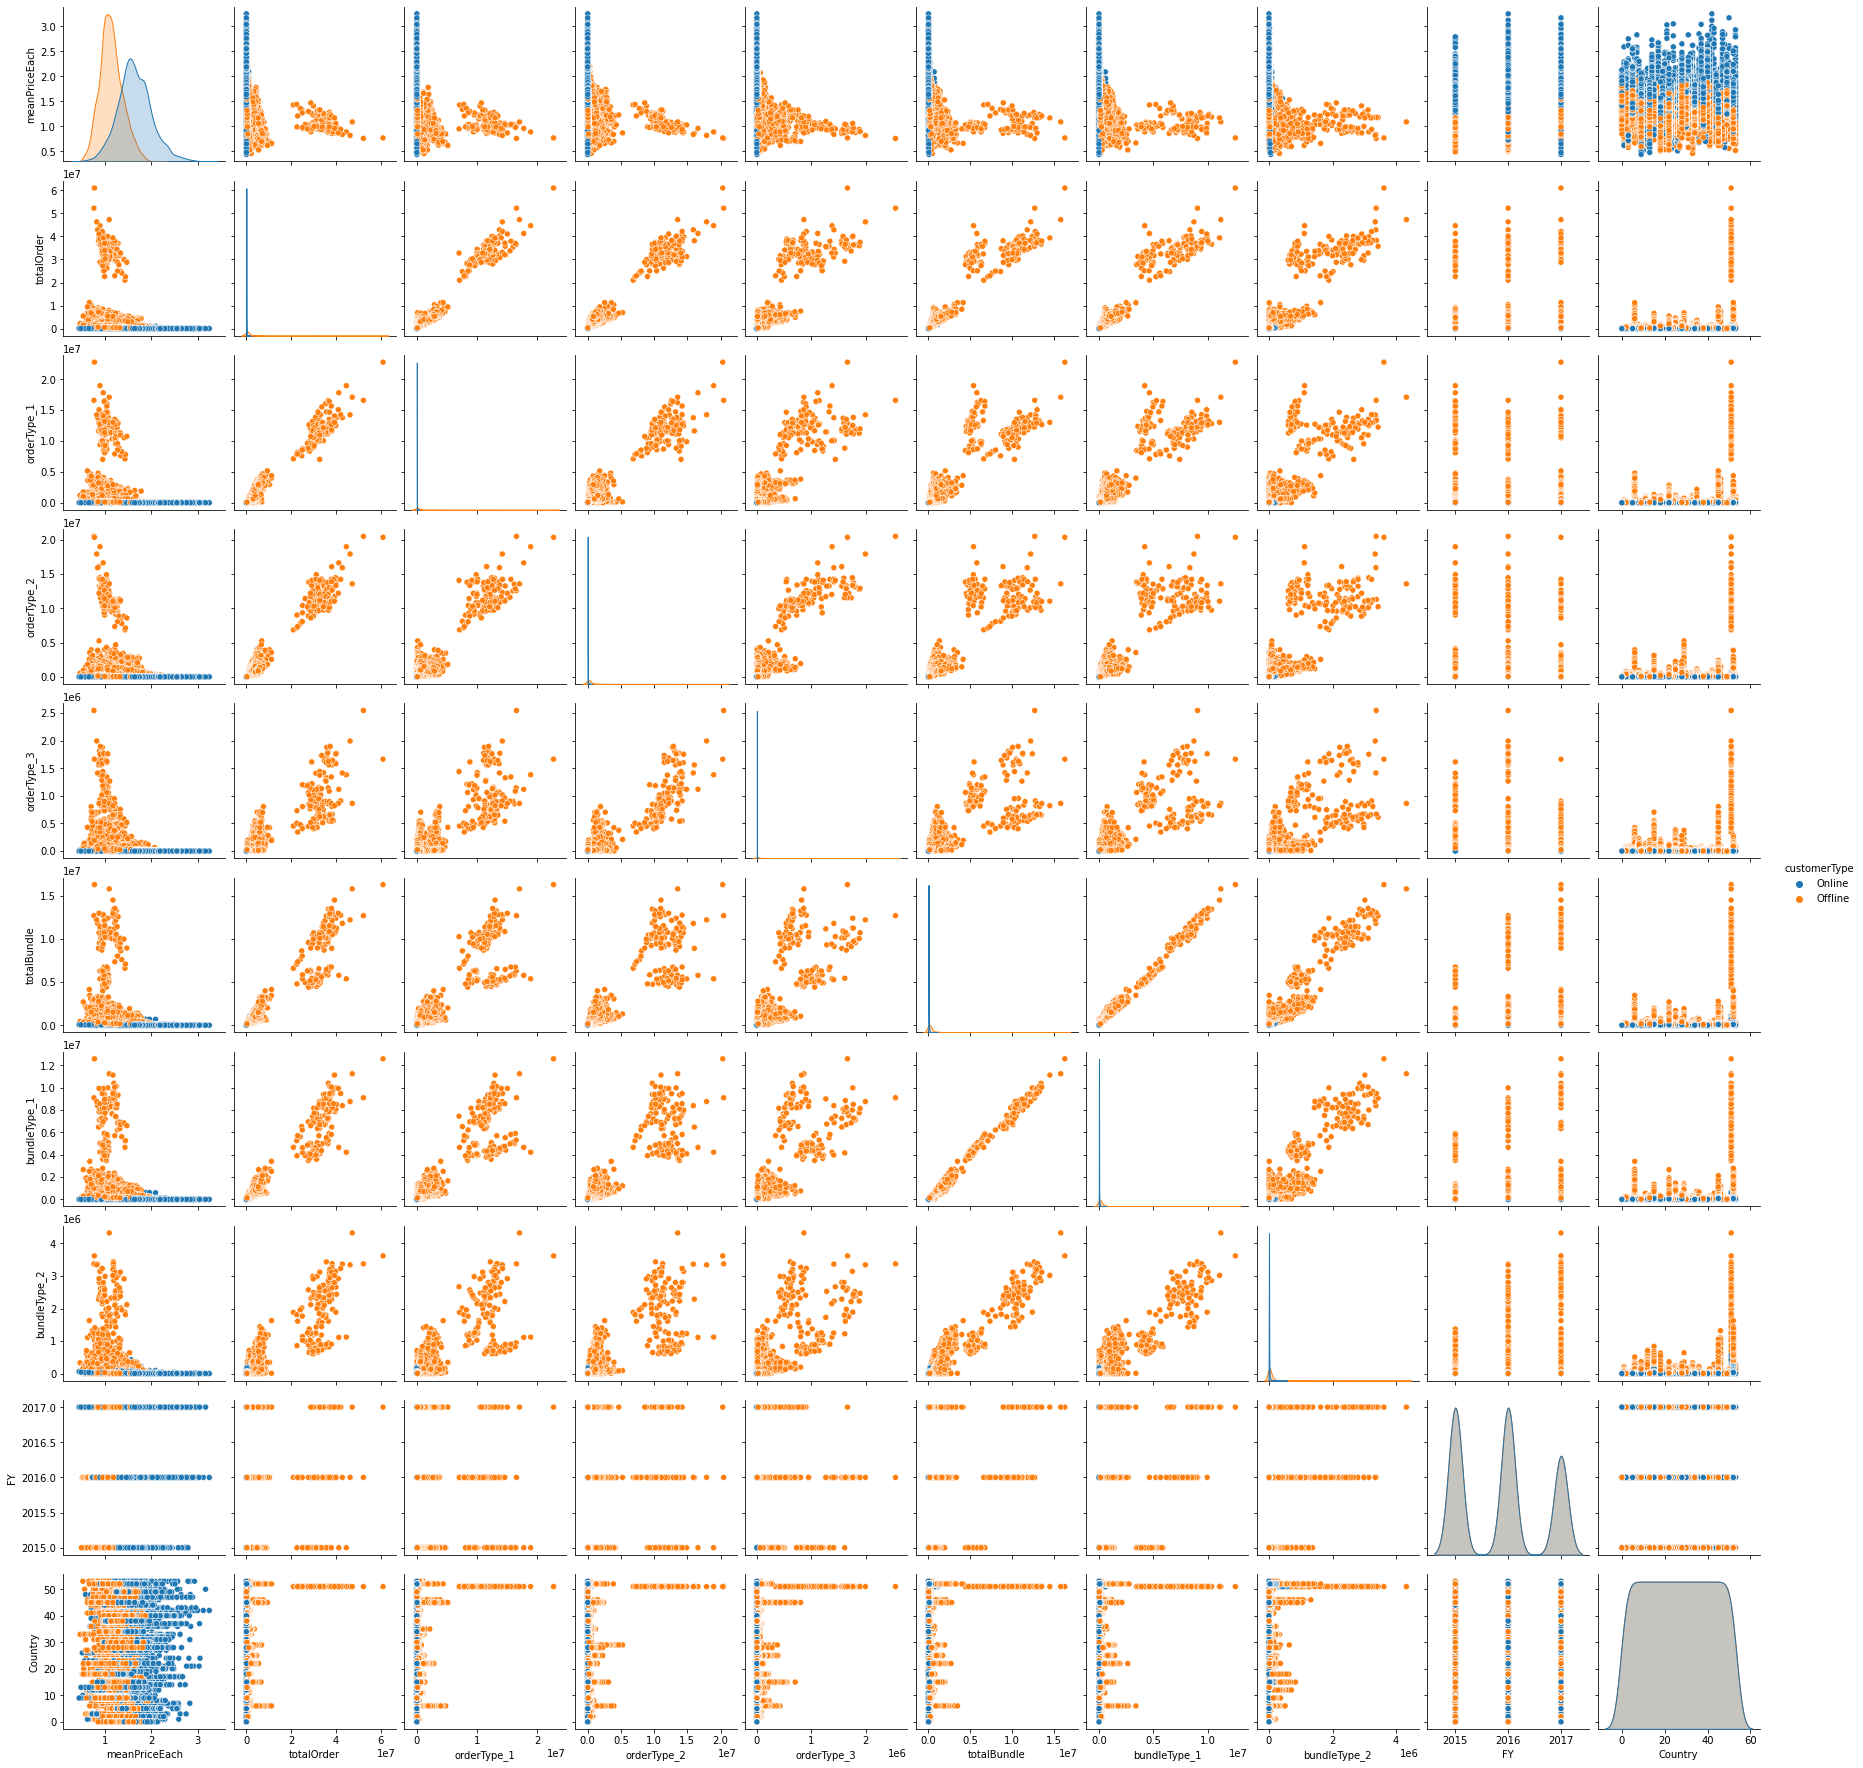

In [7]:
sns.pairplot(hue = 'customerType', data = DF)
plt.show()

# III. DF Preprocessing

> ## 1) Data Set

In [14]:
X = DF[['meanPriceEach', 'totalOrder', 'totalBundle']]
y= DF['customerType']

> ## 2) Data Split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (10506, 3) (10506,)
Test Data :  (4503, 3) (4503,)


# IV. Modeling

> ## 1) Train Date로 Model 생성

In [43]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(random_state = 2045)
Model_dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

> ## 2) Visualization

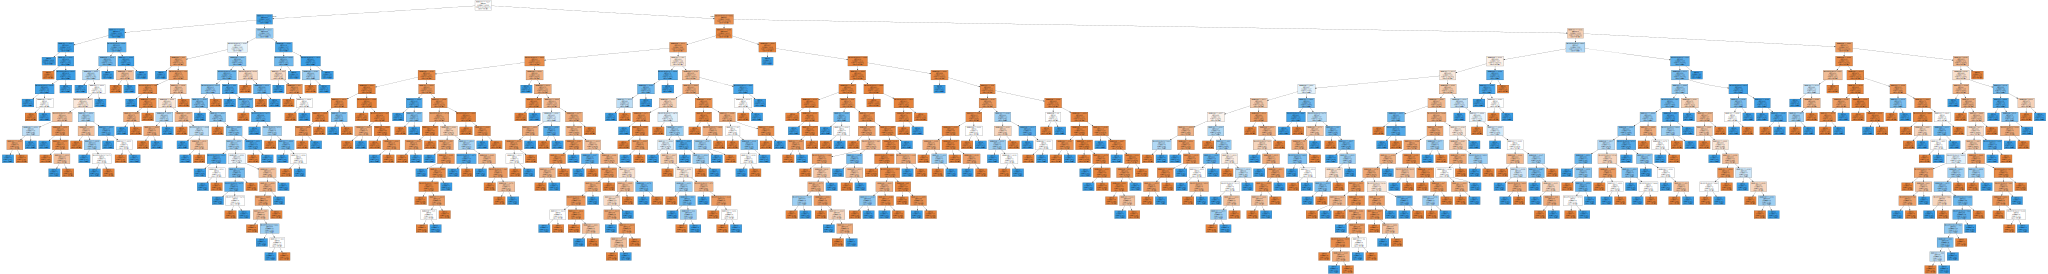

In [44]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_dt,
                                class_names = (['Offline', 'Online']),
                                feature_names = (['meanPriceEach', 'totalOrder', 'totalBundle']),
                                filled = True))

> ## 3) Test Data에 Model 적용

In [45]:
y_hat = Model_dt.predict(X_test)

y_hat

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

> ## 4) Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2107,  120],
       [ 125, 2151]])

> ## 5) Accuracy, F1-Score

In [47]:
from sklearn.metrics import accuracy_score, f1_score

Accuracy_DT = accuracy_score(y_test, y_hat)
F1_DT = f1_score(y_test, y_hat, average = None)
print(Accuracy_DT)
F1_DT

0.9455918276704419


array([0.94505495, 0.94611832])

# V. Pruning

> ## 1) Train Data로 Model 생성(max_depth = 10)

In [48]:
from sklearn.tree import DecisionTreeClassifier

Model_pr = DecisionTreeClassifier(max_depth = 10,
                                  random_state = 2045)
Model_pr.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

> ## 2) Visualization

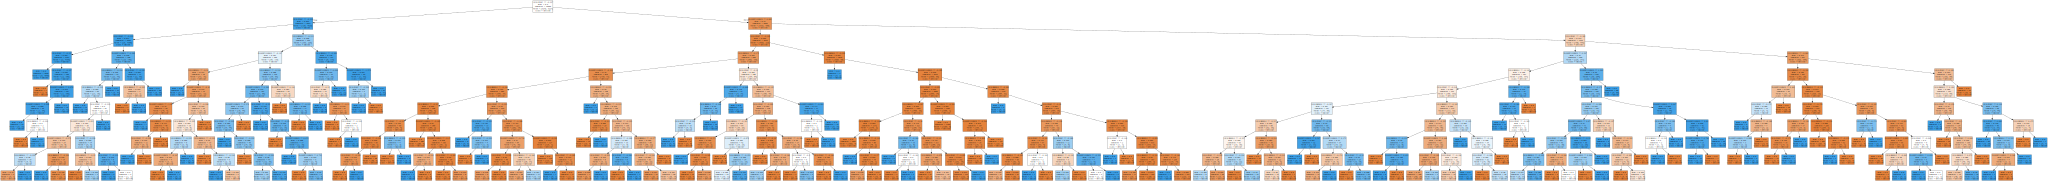

In [49]:
from sklearn.tree import export_graphviz
import graphviz

graphviz.Source(export_graphviz(Model_pr,
                                class_names = (['Offline', 'Online']),
                                feature_names = (['meanPriceEach', 'totalOrder', 'totalBundle']),
                                filled = True))

> ## 3) Test Data에 Model 적용

In [50]:
y_hat = Model_pr.predict(X_test)

y_hat

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

> ## 4) Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[2120,  107],
       [ 139, 2137]])

> ## 5) Accuracy, F1-Score

In [52]:
from sklearn.metrics import accuracy_score, f1_score

Accuracy_DT_10 = accuracy_score(y_test, y_hat)
F1_DT_10 = f1_score(y_test, y_hat, average = None)

print(Accuracy_DT_10)
F1_DT_10

0.9453697534976683


array([0.94516273, 0.94557522])

# VI. Logistic Regression

In [53]:
X = DF[['meanPriceEach', 'totalOrder', 'totalBundle']]
y= DF['customerType']

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

X_Scaled[:5]

array([[ 0.43582603, -0.22964786, -0.22178346],
       [-0.70554784,  0.50415875,  0.30108507],
       [-0.53186052,  0.43361174,  0.34500924],
       [ 0.33657613, -0.22748805, -0.22371801],
       [ 0.65913831, -0.23125111, -0.22883045]])

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_Scaled, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (10506, 3) (10506,)
Test Data :  (4503, 3) (4503,)


In [56]:
from sklearn.linear_model import LogisticRegression

Model_Ir = LogisticRegression()
Model_Ir.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
y_hat = Model_Ir.predict(X_test)

y_hat

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online',
       'Offline'], dtype=object)

In [58]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_hat)

array([[1927,  300],
       [ 209, 2067]])

In [59]:
from sklearn.metrics import accuracy_score, f1_score

Accuracy_LR = accuracy_score(y_test, y_hat)
F1_LR = f1_score(y_test, y_hat, average = None)

print(Accuracy_LR)
F1_LR

0.8869642460581835


array([0.88333715, 0.8903726 ])

# VII. Decision Tree vs. Logistic Regression

> ## 1) Accuracy

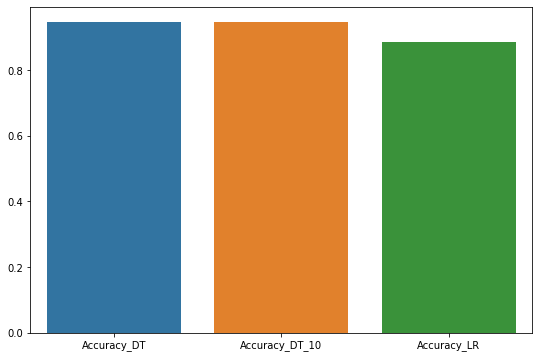

In [61]:
x = ['Accuracy_DT', 'Accuracy_DT_10', 'Accuracy_LR']
y = [Accuracy_DT, Accuracy_DT_10, Accuracy_LR]
plt.figure(figsize = (9, 6))
sns.barplot(x = x, y = y)

> ## 2) F1-Score

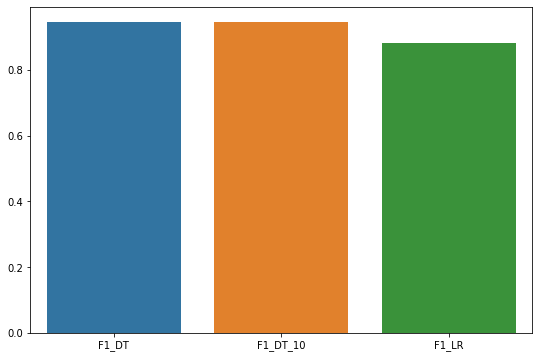

In [64]:
x = ['F1_DT', 'F1_DT_10', 'F1_LR']
y = [F1_DT[0], F1_DT_10[0], F1_LR[0]]
plt.figure(figsize = (9, 6))
sns.barplot(x = x, y = y)